### MNIST Simple Approach (Softmax)

In [1]:
import tensorflow as tf

/home/jackalhan/Development/github/more_meaningful_representations/venv/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
from tensorflow.examples.tutorials.mnist import input_data

In [3]:
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [4]:
type(mnist)

tensorflow.contrib.learn.python.learn.datasets.base.Datasets

In [6]:
#IT has convenience methods
mnist.train.images

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [7]:
mnist.train.num_examples

55000

In [8]:
mnist.test.num_examples

10000

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
mnist.train.images.shape

(55000, 784)

In [13]:
#One flattened image from the set: shape is 1,784 
image_as_flattened_vector = mnist.train.images[1]

In [14]:
#One image from the set: shape is 28,28 
image_as_matrix = mnist.train.images[1].reshape((28,28))

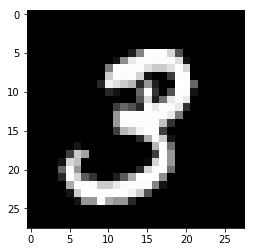

In [17]:
plt.imshow(image_as_matrix, cmap='gist_gray')

In [18]:
# since the dataset from tensorflow is already normalied, we can show it by typing the :
image_as_matrix.min()

0.0

In [19]:
image_as_matrix.max()

1.0

In [29]:
# PLACEHOLDERS
# It is none because it is going to be filled by batch size.
X = tf.placeholder(tf.float32, shape=[None, 784]) # images
y = tf.placeholder(tf.float32, shape=[None, 10]) # labels

In [27]:
# VARIABLES
# Our WEights and Biases
# Initiate W and b with zeros but this is not a good initiazlization.
W = tf.Variable(tf.zeros([784, 10])) # 10 possible outcomes
b = tf.Variable(tf.zeros([10]))

In [36]:
# CREATE GRAPH OPERATIONS
y_preds = tf.matmul(X, W) + b

In [37]:
# LOSS FUNCTIONS
loss_function_cross_entropy = tf.reduce_mean(
    tf.nn.softmax_cross_entropy_with_logits(
        labels = y,
        logits = y_preds))

In [38]:
# OPTIMIZER
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.5)
train = optimizer.minimize(loss_function_cross_entropy)

In [41]:
# CREATE SESSION TO RUN ALL THESE
init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)
    
    #Train the model with batches
    for step in range(1000):
        batch_X, batch_y = mnist.train.next_batch(batch_size=100)
        sess.run(train, feed_dict={X:batch_X, y:batch_y})
    
    # ***** Evaluate Model *******
    # We are asking the tf, what is the hishest probability class in the 
    # index position match exactly with the labels
    # compare prediction z with ys, tf has a tf.equal function where I can pass tensors it
    # basically reports back a list of booleans
    correct_predictions = tf.equal(tf.argmax(y_preds,axis=1), tf.argmax(y,1))
    # Let us explain what is going on at above code: 
    # Predicted [3,4], True Label [3,9] so correct predictions [True, False]
    
    # output is going to be [True, False, True, ....]
    # so we need to convert it to number such as [1, 0, 1, ....] an take average for accuracy
    acc = tf.reduce_mean(tf.cast(correct_predictions, dtype=tf.float32))
    
    print('Accuracy:', sess.run(acc, feed_dict={X:mnist.test.images, y:mnist.test.labels}))

Accuracy: 0.9187
